 #### Install necessary dependacies

In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
import os
os.environ["MUJOCO_GL"] = "glfw"

#### Create environment and train model

In [2]:
from gymnasium.wrappers import TimeLimit

env_name = "Reacher-v5"
env = gym.make(env_name)
env = TimeLimit(env, max_episode_steps=200)  


In [3]:
%load_ext tensorboard
%tensorboard --logdir ./Walker2d_tensorboard/

In [4]:
model = PPO(
    'MlpPolicy',
    env,
    verbose=1, 
    batch_size=64,
    n_steps=1024,
    gamma=.99,
    learning_rate= 1e-4,
    ent_coef= 0.01,
    clip_range=0.1,
    n_epochs=10,
    gae_lambda=0.9,
    max_grad_norm=0.6,
    vf_coef= 0.677239,
    tensorboard_log="./reacher_tensorboard"
)

#train model here
model.learn(total_timesteps=2000000)

model.save("model_reacher")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./reacher_tensorboard/PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -62.3    |
| time/              |          |
|    fps             | 8181     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 512      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 50           |
|    ep_rew_mean          | -61.9        |
| time/                   |              |
|    fps                  | 4458         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0015106823 |
|    clip_fraction        | 0.0285       |
|    clip_r

#### Valdiate model by having it interact with live MuJoCo environment

In [5]:
#Load model here
model.load("model_reacher")

/Users/jabinwade/miniconda3/envs/RLTraining/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:293: UserWarning: WARN: Overwriting existing videos at /Users/jabinwade/Coding/ModernAIFinalProject/continous_env/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


timestep: 0
action: [0.2445449  0.29514056]
episode reward: -0.45714993026523304
(-0.45714993026523304, False, False, {'reward_dist': -0.31023976948528004, 'reward_ctrl': -0.146910160779953})
Reward Info: {'reward_dist': -0.31023976948528004, 'reward_ctrl': -0.146910160779953}
timestep: 1
action: [0.35687378 0.3848623 ]
episode reward: -1.046887411476681
(-0.589737481211448, False, False, {'reward_dist': -0.31425959501149686, 'reward_ctrl': -0.27547788619995117})
Reward Info: {'reward_dist': -0.31425959501149686, 'reward_ctrl': -0.27547788619995117}
timestep: 2
action: [0.34959066 0.28764892]
episode reward: -1.5725232835641203
(-0.5256358720874392, False, False, {'reward_dist': -0.32068033894058107, 'reward_ctrl': -0.20495553314685822})
Reward Info: {'reward_dist': -0.32068033894058107, 'reward_ctrl': -0.20495553314685822}
timestep: 3
action: [0.36603945 0.19323555]
episode reward: -2.0720429366451167
(-0.4995196530809965, False, False, {'reward_dist': -0.32819480395227335, 'reward_ct

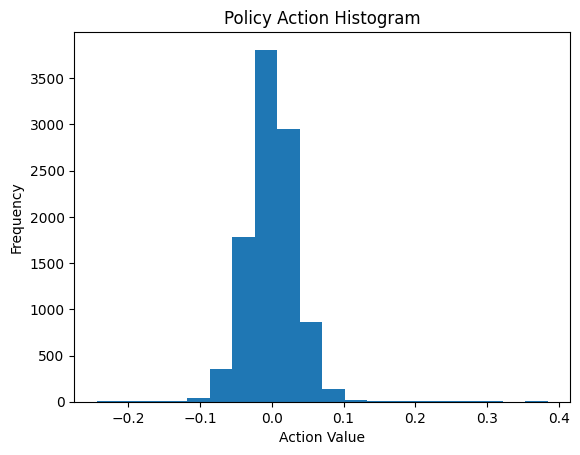

In [6]:
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np
env_name = "Reacher-v5"
env = gym.make(env_name, render_mode = "rgb_array")
env = RecordVideo(env, "./videos")

env_data = env.reset()
obs = env_data[0]

actions = []
episode_reward = 0
max_ep_timesteps = 5000

for t in range(max_ep_timesteps):
    print(f"timestep: {t}")
    action, _ = model.predict(obs)
    env_data = env.step(action)
    obs = env_data[0]
    reward = env_data[1]
    done = env_data[2]
    truncated = env_data[3]
    actions.append(action)

    episode_reward += reward

    print(f"action: {action}")
    print(f"episode reward: {episode_reward}")
    print(env_data[1:])

    # Reward info printing (if available)
    if len(env_data) >= 5:
        info = env_data[4]
        print(f"Reward Info: {info}")

    if done : break

# Plot after episode
plt.hist(np.array(actions).flatten(), bins=20)
plt.title("Policy Action Histogram")
plt.xlabel("Action Value")
plt.ylabel("Frequency")
plt.show()

env.close()